## Explore metadata for a curated dataset

This notebook shows how to explore the metadata of your JSTOR and/or Portico dataset using Python. The following processes are described:

* Importing your dataset
* Discovering the size and contents of your dataset
* Turning your dataset into a pandas dataframe
* Visualizing the contents of your dataset as a graph with pandas

A familiarity with pandas is helpful but not required.
____
We import the [pandas](./key-terms.ipynb#pandas) module to help visualize and manipulate our data. Importing `as pd` allows us to call pandas' functions using the short phrase `pd` instead of typing out `pandas` each time. 

In [96]:
import pandas as pd

We import the `Dataset` module from the `tdm_client` library. The tdm_client library contains functions for connecting to the JSTOR server containing our [corpus](./key-terms.ipynb#corpus) [dataset](./key-terms.ipynb#dataset). To analyze your dataset, use the [dataset ID](./key-terms.ipynb/#dataset-ID) provided when you created your [dataset](./key-terms.ipynb/#dataset). A copy of your [dataset ID](./key-terms.ipynb/#dataset-ID) was sent to your email when you created your [corpus](./key-terms.ipynb#corpus). It should look like a long series of characters surrounded by dashes. 

In [97]:
from tdm_client import Dataset

We create a new variable **dset** and initialize its value using the **Dataset** function. A sample **dataset ID** featuring Shakespeare Quarterly (1950-2014) is provided here ('59c090b6-3851-3c65-e016-9181833b4a2c'). Pasting your unique **dataset ID** here will import your dataset from the JSTOR server.

**Note**: If you are curious what is in your dataset, there is a download link in the email you received. The format and content of the files is described in the notebook [Building a Dataset](./1-building-a-dataset.ipynb). 

In [98]:
# Parameters:
dataset_id = '59c090b6-3851-3c65-e016-9181833b4a2c'

In [99]:
dset = Dataset(dataset_id)

Print the text of the query that built this dataset.

In [100]:
dset.query_text()

'All documents from Portico published in Shakespeare Quarterly from 1700 - 2019'

Find total number of documents in the dataset using the `len()` function. 

In [101]:
len(dset)

6687

The dset variable now contains all the documents in our corpus. We can take a peak at our documents using in our dataset by taking a slice of the first five items.

In [102]:
dset.items[0:5]

['http://www.jstor.org/stable/2869980',
 'http://www.jstor.org/stable/2870198',
 'http://www.jstor.org/stable/2870199',
 'http://www.jstor.org/stable/2870209',
 'http://www.jstor.org/stable/2870208']

We can also check if a particular item is in our list if we know the stable url using the `in` or `not in` operators. Let's check to see if Shakespearean scholar Theodore B. Leinwand's article "Shakespeare and the Middling Sort" is in our dataset. From a JSTOR search, I know that the stable URL for the article is: https://www.jstor.org/stable/2871420 . We can put this stable URL in a string between single quotes and evaluate the phrase with `in dset.items`. If the article is in our dataset, we will receive `true`. If it is not our dataset, we will receive `false`. 

In [103]:
'http://www.jstor.org/stable/2871420' in dset.items

True

The document metadata can be retrieved by calling the `get_metadata` method. The metadata is a list of Python dictionaries containing attributes for each document. We create a new list variable `metadata` by using the `get_metadata` method on dset. 

In [104]:
metadata = dset.get_metadata()

Print the contents of **metadata** for the first document in the dataset. The data is displayed as a dictionary of key/value pairs. 

In [105]:
print(metadata[0])

{'id': 'http://www.jstor.org/stable/2869980', 'docType': 'article', 'title': 'Review Article', 'creators': ['R. A. Foakes'], 'isPartOf': 'Shakespeare Quarterly', 'sourceCategory': ['Language & Literature', 'Humanities', 'Performing Arts', 'Arts'], 'pageStart': '275', 'url': 'http://www.jstor.org/stable/2869980', 'volumeNumber': '2', 'language': ['eng'], 'pageEnd': '276', 'pageCount': 2, 'pagination': 'pp. 275-276', 'datePublished': '1986-07-01T00:00:00Z', 'publicationYear': 1986, 'publisher': 'Folger Shakespeare Library', 'wordCount': 935, 'tdmCategory': ['Literature (General)', 'History General', 'English literature'], 'provider': 'jstor', 'outputFormat': ['unigram'], 'identifier': [{'name': 'issn', 'value': '00373222'}, {'name': 'oclc', 'value': '39852252'}, {'name': 'local_doi', 'value': '10.2307/2869980'}]}


We can convert `metadata` to a Pandas dataframe to take advantage of its plotting and manipulation functions. This will help us learn more about what's in our metadata. We define this new dataframe as `df`.

In [106]:
df = pd.DataFrame(metadata)

Print the first 5 rows of the dataframe `df` with the `head` attribute.

In [107]:
df.head()

,id,docType,title,creators,isPartOf,sourceCategory,pageStart,url,volumeNumber,language,...,publicationYear,publisher,wordCount,tdmCategory,provider,outputFormat,identifier,abstract,bigramCount,trigramCount
0,http://www.jstor.org/stable/2869980,article,Review Article,[R. A. Foakes],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",275,http://www.jstor.org/stable/2869980,2,[eng],...,1986,Folger Shakespeare Library,935,"[Literature (General), History General, Englis...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN
1,http://www.jstor.org/stable/2870198,article,Shakespeare in Sydney,[Robyn S. Heales],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",106,http://www.jstor.org/stable/2870198,1,[eng],...,1986,Folger Shakespeare Library,2032,"[Periodicals, Literature (General), Arts in ge...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN
2,http://www.jstor.org/stable/2870199,article,"Shakespeare in the Berkshires, 1985",[Ronald R. Macdonald],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",108,http://www.jstor.org/stable/2870199,1,[eng],...,1986,Folger Shakespeare Library,1805,"[Literature (General), Periodicals, Academies ...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN
3,http://www.jstor.org/stable/2870209,article,Review Article,[Laura G. Bromley],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",136,http://www.jstor.org/stable/2870209,1,[eng],...,1986,Folger Shakespeare Library,1023,"[Socialism. Communism. Anarchism, Religions. M...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN
4,http://www.jstor.org/stable/2870208,article,Review Article,[James H. Maddox],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",135,http://www.jstor.org/stable/2870208,1,[eng],...,1986,Folger Shakespeare Library,965,"[English literature, Biography, Modern languag...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN


We can find the year range in our pandas dataframe by finding the minimum and maximum of `datePublished`.

In [108]:
minYear = df['publicationYear'].min()
maxYear = df['publicationYear'].max()

print(str(minYear) + ' to ' + str(maxYear))

1950 to 2013


Now let's do some preliminary analysis. Let's say we want to plot the number of documents by decade in the sample set. 

Since `decade` isn't a value in our dataset, we need to add it to the dataframe. We can do this by defining a new dataframe column `decade`. To translate a year (1925) to a decade (1920), we need to subtract the final digit so it becomes a zero. We can find the value for the final digit in any particular case by using modulo (which provides the remainder of a division). Here's an example using the date 1925.

In [109]:
1925 - (1925 % 10)

1920

We can translate this example to the whole dataframe using the following code.

In [110]:
def add_decade(value): 
    yr = int(value) 
    decade = yr - ( yr % 10 )
    return decade

df['decade'] = df['publicationYear'].apply(add_decade)

To see the new decade column in our data, let's print the first 5 rows of the dataframe again.

In [111]:
df.head()

,id,docType,title,creators,isPartOf,sourceCategory,pageStart,url,volumeNumber,language,...,publisher,wordCount,tdmCategory,provider,outputFormat,identifier,abstract,bigramCount,trigramCount,decade
0,http://www.jstor.org/stable/2869980,article,Review Article,[R. A. Foakes],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",275,http://www.jstor.org/stable/2869980,2,[eng],...,Folger Shakespeare Library,935,"[Literature (General), History General, Englis...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN,1980
1,http://www.jstor.org/stable/2870198,article,Shakespeare in Sydney,[Robyn S. Heales],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",106,http://www.jstor.org/stable/2870198,1,[eng],...,Folger Shakespeare Library,2032,"[Periodicals, Literature (General), Arts in ge...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN,1980
2,http://www.jstor.org/stable/2870199,article,"Shakespeare in the Berkshires, 1985",[Ronald R. Macdonald],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",108,http://www.jstor.org/stable/2870199,1,[eng],...,Folger Shakespeare Library,1805,"[Literature (General), Periodicals, Academies ...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN,1980
3,http://www.jstor.org/stable/2870209,article,Review Article,[Laura G. Bromley],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",136,http://www.jstor.org/stable/2870209,1,[eng],...,Folger Shakespeare Library,1023,"[Socialism. Communism. Anarchism, Religions. M...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN,1980
4,http://www.jstor.org/stable/2870208,article,Review Article,[James H. Maddox],Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",135,http://www.jstor.org/stable/2870208,1,[eng],...,Folger Shakespeare Library,965,"[English literature, Biography, Modern languag...",jstor,[unigram],"[{'name': 'issn', 'value': '00373222'}, {'name...",NaN,NaN,NaN,1980


Now we can use the built in plotting tools of Pandas to plot the number of documents from each provider by decade.

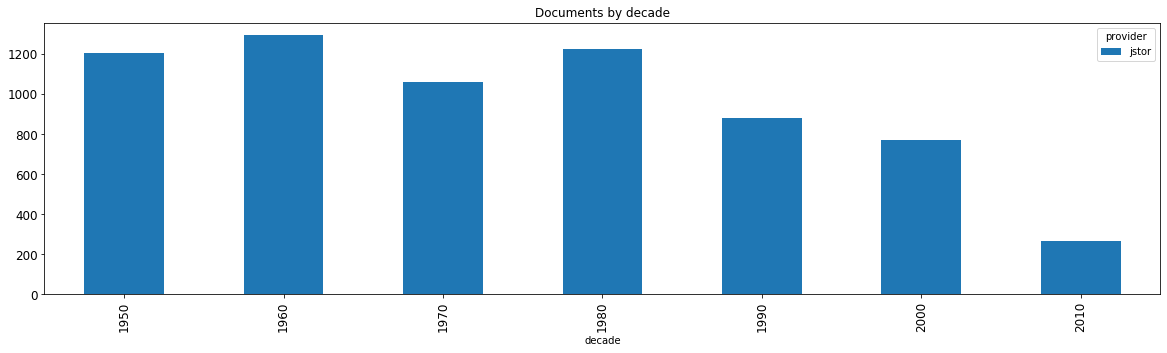

In [112]:
df.groupby(['decade', 'provider'])['id'].agg('count').unstack()\
    .plot.bar(title='Documents by decade', figsize=(20, 5), fontsize=12, stacked=True); ##There is a weird bug where this cell needs to be run twice.

And do the same for the total number of pages.

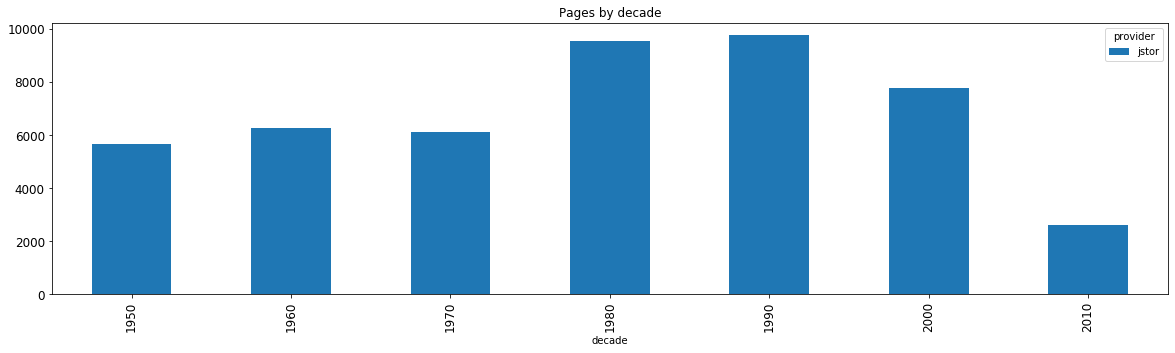

In [113]:
df.groupby(['decade', 'provider'])['pageCount'].agg('sum').unstack()\
    .plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12, stacked=True);